<a href="https://colab.research.google.com/github/suphalaksana/Multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [41]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [42]:
Name = 'ศุภลักษณา  บัวจันทร์'
ID = '6230205404'

In [43]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [44]:
Data = DataGenerator(Name,ID)

020:30:20


In [45]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,3.773747,6.061187,-9.222883,-8.954075,6.305175,0.292267,7.613113,1.220585,7.528680,-0.619801,7.349913,-2.810641,-3.111243,-1.079978,-2.554639,6.921826,-2.531105,-3.615193,-1.092670,-0.952016,3.812928,-7.987567,4.027819,-2.660919,7.456041,-7.316476,5.960466,-2.767330,-8.676474,5.676556,12.122375,30.382779
1,8.484404,-5.319557,-8.296086,-3.727046,3.417146,-2.354321,-3.198962,-5.068781,9.627884,-1.186137,7.624599,3.679341,-6.719260,9.427014,0.545413,-8.229463,0.397966,-6.307839,3.660300,-3.227168,-6.623447,9.712237,-7.599891,4.959062,2.586674,7.743150,-1.866618,-9.646674,-0.839624,-4.623120,-10.639114,-21.115602
2,-0.885176,-2.064377,-1.735326,7.347219,2.895234,-6.591421,4.689732,-1.831760,5.527787,-2.187902,-4.621077,-2.095996,-6.282829,-6.921801,-3.469243,3.709721,1.311006,8.423316,4.180588,-7.635288,8.171219,-4.399013,-8.206858,-2.485293,2.718617,-3.658901,-3.315503,8.318886,9.889534,4.934751,-4.128754,26.673756
3,0.928953,-3.955223,-7.030693,9.744129,-0.342992,1.773401,-7.167229,4.207292,3.302174,3.398619,5.902347,6.416682,-1.720844,8.569327,-9.563628,5.719072,6.597021,0.552377,3.057767,9.206791,-3.929266,-0.312406,-0.848727,5.037263,-9.414485,-8.538412,-6.457095,8.513097,-3.362707,4.125484,-7.910447,22.627419
4,-5.690987,-3.517787,-2.858825,-7.169143,-5.605544,-9.054258,6.521987,-0.913724,-7.339663,-9.462569,1.945500,-4.143945,1.903859,-0.889551,9.734788,2.465684,-0.186815,10.274393,5.035283,-7.027597,-8.250220,0.108123,6.192776,2.864375,-6.834458,-2.341450,-6.447813,-8.751939,-7.332672,5.696778,-7.035574,30.483889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.631343,-5.922440,-7.594832,-1.042551,3.699737,0.414187,-1.054134,-8.502152,8.658479,4.100714,7.837780,3.280779,-7.556245,7.024185,-1.320418,-9.951174,-0.452707,-5.646853,5.616549,-4.387339,-7.612117,9.434799,-7.439684,5.362935,5.604233,7.636980,-3.764263,-9.298095,-4.074592,-3.094425,-11.844880,-13.472124
9996,-9.164097,3.211174,-1.865883,-9.905384,-3.836890,7.568548,-5.732555,-7.434602,-5.328562,11.115293,2.945332,1.038299,0.860420,7.597590,-0.083376,4.711684,6.783715,8.115086,-7.911840,-3.839552,6.007630,-0.106223,-2.183768,3.416250,2.309178,-3.919674,4.573433,-5.643815,6.567515,-10.614089,6.422348,-51.070443
9997,-4.069899,-2.351560,-0.134604,-5.629799,-5.620890,-9.770339,6.168892,0.835266,-3.912655,-7.703638,1.361204,-3.658080,2.902530,-0.667720,7.789704,2.017346,1.698594,8.220736,4.792831,-8.864895,-8.932504,-0.911860,4.953654,-1.065717,-6.648004,-2.566931,-6.526202,-7.488712,-6.361973,5.717083,-4.703120,30.585414
9998,4.873270,-1.541458,-7.629112,2.557538,8.061374,9.162759,5.372126,1.288333,-8.305103,6.020796,3.953505,0.351103,4.409830,8.857026,-6.120125,-5.882252,-1.019697,-3.206716,-3.188903,4.414865,2.048225,-6.216080,0.629628,-5.189581,-8.773632,3.442669,10.901293,-8.050083,-2.491982,-5.548942,-3.082917,-25.744708


#2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

ข้อมูลชุดนี้ไม่มี ที่เป็นข้อความแล้ว มีแต่ที่เป็นตัวเลขจึงไม่ต้องตัด column ใดออก

###ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions

In [46]:
Data.shape #มี Data 10000 ตัว และมี 32 dimensions  
#dimensions เยอะมาก ต้องทำการลด dimensions ลงโดยทำการตัด colums ที่ซ้ำกันออกไปแต่ ข้อมูลชุดนี้ไม่มี ที่เป็นข้อความแล้ว มีแต่ที่เป็นตัวเลขจึงไม่ต้องตัดแถวใดออก

(10000, 32)

#clustering

####import

In [47]:
from sklearn.cluster import KMeans  #import k mean เพราะวิธีการทำ cluster มีอีกหลายวิธี เพราะวิธีนี้ง่ายที่สุด

####Define

In [48]:
kmeans = KMeans(n_clusters = 3, random_state=2021) #ไม่ต้องใส่พารามิเตอร์อะไรเลยเพราะไม่จำเป็นต้องใส่ 
#random_state กำหนดให้ค่า random ทุกคนเหมือนกัน  k= 3

####Fit-transform

คำนวณหาจุด cluter centers ของข้อมูล example_df_drop ด้วยวิธี K-means clustering

In [49]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

แสดง จุด cluster centers ที่คำนวณออกมาได้

In [50]:
kmeans.cluster_centers_  #จุดศูนย์กลางของทั้งหมด 3 กลุ่ม เพราะ K = 3  และมี 32 dimensions #จุดเซนทรอยด์

array([[ 1.02832062e+00, -3.39348801e+00, -5.43401124e-01,
         2.31895603e+00, -2.61186597e+00,  3.10440922e+00,
         5.20947997e+00, -1.60333380e+00, -3.30975440e+00,
        -3.65944441e+00,  2.56940338e+00, -1.13223497e+00,
         1.83263251e+00,  2.21162135e+00,  6.50933415e+00,
         1.96181243e+00, -3.60606622e-01,  4.46879453e+00,
         5.22390188e+00, -2.05593008e+00, -1.19518278e+00,
         1.47839853e+00,  4.07043215e+00,  1.46245661e+00,
         3.65428109e+00, -1.97333539e-01, -2.30701430e+00,
        -5.34254212e-01, -2.29421964e+00,  6.78524442e+00,
        -6.78697603e+00,  3.59262221e+01],
       [ 1.30387370e+00,  2.69301182e+00, -2.18515548e+00,
         1.49719982e+00,  1.30921003e+00, -1.64313902e+00,
         2.67657253e+00,  2.09687483e+00,  3.99283759e+00,
        -2.23265619e+00,  6.79411292e-01, -4.01163705e-01,
        -1.34981230e+00, -1.14381993e+00, -3.93304894e+00,
        -4.53765999e-01, -4.11889093e-02,  1.74974350e+00,
         1.50

ทำการจัดกลุ่มของ Data

In [51]:
y = kmeans.predict(Data)   #บอกว่าจุดไหนอยู่กลุ่มไหน #มี 32 dimensions plot ไม่ได้เลยต้องทำ PCA ข้อมูลเพื่อลด dimensions ลงมา
y

array([1, 2, 1, ..., 0, 2, 1], dtype=int32)

#ทำ PCA ข้อมูล Data แล้ว วาดกราฟ scatter plot โดยใส่สีตามผลการทำ kmeans clustering แล้วนำมาเทียบกับ กราฟ PCA - scatter ของข้อมูลจริง

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  #เอาแค่ 2 dimensions

new_pca = pca.fit_transform(Data)  ## record - แถว  , dimension - หลัก

In [53]:
new_pca

array([[-32.15047924,  15.69237452],
       [ 22.60483915, -12.56527885],
       [-27.23486266,   0.19080876],
       ...,
       [-31.31833379,  -5.96823131],
       [ 28.33856167,  -3.37849013],
       [ -5.78207392, -12.82563484]])

#ของจริง

In [54]:
from matplotlib import pyplot as plt

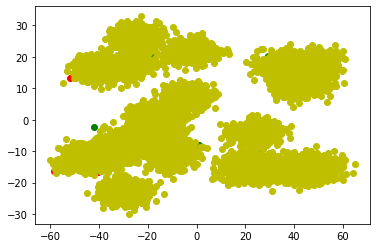

In [55]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or')   #สีจริง#คำตอบที่แท้จริง #แบบธรรมดาทำ PCA กี่รอบก็ได้เท่าเดิม เพราะมองในมุมองที่ data กระจายดีที่สุด
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy')  #สีเขียวอ่อนกระจายและทับสีอื่นไปหมด

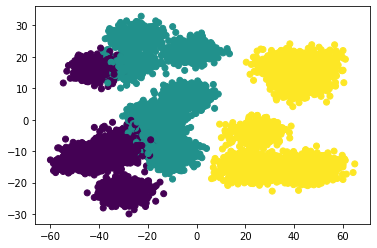

In [56]:
kmeans = KMeans(n_clusters=3, random_state=2021) #plotตามที่เราทำ มันจับคู่สีที่อยู่ใกล้กัน
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

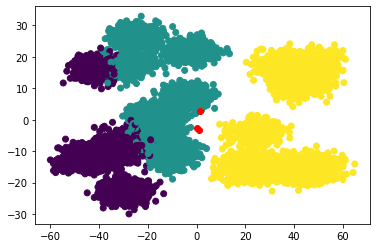

In [57]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y) # cluster center
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'or')

#elbow method
elbow method จะ plot กราฟคล้ายๆศอก

SSE วัดระยะห่างของ center ทุกๆจุดว่าห่างกันเท่าไหร่ จากนั้นเอามา sum รวมกัน

ใกล้กับ center มากยิ่งดี

In [58]:
kmeans.inertia_ ##หาค่า SSE (Sum of Squared Errors)

10989012.264080929

In [59]:
SSE = list()   #วนรูปเพื่อจะเปลี่ยน k จาก 1 เป็น2,3,4,5,6,7,8
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [60]:
SSE  #รันออกมาผลลัพธ์มีทั้งหมด 8 ตัว

[21043525.2946053,
 12533065.08609684,
 10989012.264080929,
 9863756.63160429,
 9019631.747012235,
 8248184.2299705325,
 7377188.501246718,
 6571670.621149184]

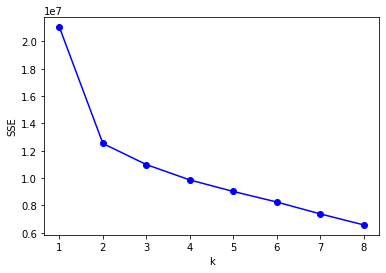

In [61]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')   #นำค่า SSE มา plot กราฟ#elbow คือศอก  2 คือ ศอก

plt.xlabel('k')
plt.ylabel('SSE');

#silhouette coefficient
1.How close the data point is to other points in the cluster คำนวณว่า data แต่ละอันที่อยู่ในกลุ่มเดียวกันมันอยู่ใกล้กับจุดอื่น ๆ ในคลัสเตอร์อย่างไร

2.How far away the data point is from points in other clusters จุดข้อมูลอยู่ห่างจากจุดในคลัสเตอร์อื่นแค่ไหน

In [65]:
from sklearn import metrics

In [66]:
SilH = list() #silhouette scores คิดข้อมูลที่มีกลุ่มเดียวไม่ได้
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

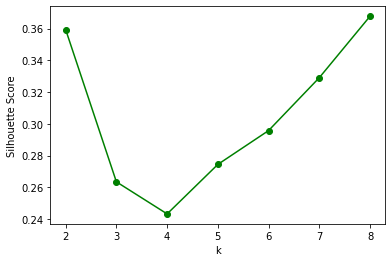

In [67]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g') #ดูกราฟจากจุด silhouette scores ที่สูงที่สุด มีค่ามากแสดงว่าใกล้กันมาก มีค่าตั้งแต่-1ถึง 1  #ดีที่สุดคือ 8เพราะสูงสุด
plt.xlabel('k')
plt.ylabel('Silhouette Score');

#3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

ลด Dimension ของข้อมูล

###ลอง plot scatter matrix เพื่อดูการกระจาย ของ data ใน มุมมองต่างๆ

In [68]:
import pandas as pd

In [69]:
#pd.plotting.scatter_matrix(Data)  #dimension เยอะไปทำให้มองไม่ออก

###ตรวจสอบว่าละหว่าง columns มี correlationกันมากน้อยแค่ไหน ด้วย numpy


In [70]:
import numpy as np#numpy ใช้กับข้อมูลที่เป็นตัวเลข

In [71]:
corr = np.corrcoef(Data.to_numpy().T)

In [72]:
corr #ดูขนาดของ correlation

array([[ 1.        ,  0.01185574, -0.01839796, ...,  0.14290484,
         0.01185574,  0.14290484],
       [ 0.01185574,  1.        ,  0.20075925, ...,  0.08729637,
         1.        ,  0.08729637],
       [-0.01839796,  0.20075925,  1.        , ..., -0.07158635,
         0.20075925, -0.07158635],
       ...,
       [ 0.14290484,  0.08729637, -0.07158635, ...,  1.        ,
         0.08729637,  1.        ],
       [ 0.01185574,  1.        ,  0.20075925, ...,  0.08729637,
         1.        ,  0.08729637],
       [ 0.14290484,  0.08729637, -0.07158635, ...,  1.        ,
         0.08729637,  1.        ]])

In [73]:
for i in range(corr.shape[0] ): #วน loop เพื่อดูว่ามีค่า correlation ใด มีค่าเท่ากับ 1 โดยไม่เอาค่าจากเส้นทแยงมุม
  for j in  range(corr.shape[1] ):# cor ว่าถ้าเป็น 1 คือซ้ำกัน  มีแถวซ้ำแค่ 2แถว คือ  1 กับ 30  ,29 กับ 31  ที่เหลือคือสลับที่กัน
    if( i !=j) and (corr [i,j] == 1.):
      print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

row = 1 column = 30 corrcoef = 1.0
row = 29 column = 31 corrcoef = 1.0
row = 30 column = 1 corrcoef = 1.0
row = 31 column = 29 corrcoef = 1.0


In [74]:
Data.iloc[:5,29:32]  #ดูแถวที่ซ้ำกัน

,29,30,31
0,5.676556,12.122375,30.382779
1,-4.623120,-10.639114,-21.115602
2,4.934751,-4.128754,26.673756
3,4.125484,-7.910447,22.627419
4,5.696778,-7.035574,30.483889


In [75]:
from matplotlib import pyplot as plt

##data ที่มี correlation เป็น 1

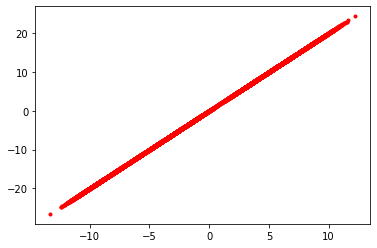

In [76]:
plt.plot(Data.iloc[:,1],Data.iloc[:,30],'r.')   #กราฟแบบนี้แปลว่ามี column ที่ซ้ำกันควรลบออก

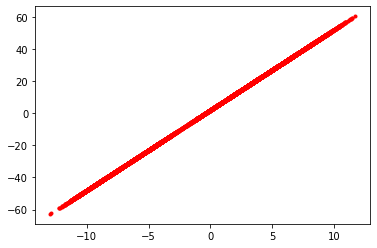

In [77]:
plt.plot(Data.iloc[:,29],Data.iloc[:,31],'r.')


##data ที่มี correlation เป็นค่าอื่นๆ

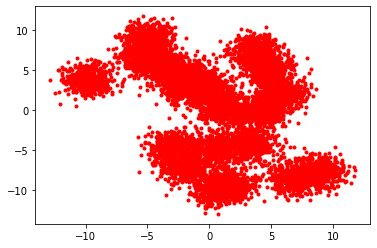

In [78]:
plt.plot(Data.iloc[:,11],Data.iloc[:,29],'r.')

#ลบ column ซ้ำ

หลัก ตั้ง คอมลัม นอน ดูว่าซ้ำกันยังไง ดูที่ค่า cor ว่าถ้าเป็น 1 คือซ้ำกัน

In [101]:
Data.columns

RangeIndex(start=0, stop=32, step=1)

In [99]:
newdata_drop = Data.iloc[:,30]  ##เอาทุกแถวตัด colums   สุดท้ายที่เป็นชื่อออก [:,-2]
newdata_drop

0       12.122375
1      -10.639114
2       -4.128754
3       -7.910447
4       -7.035574
          ...    
9995   -11.844880
9996     6.422348
9997    -4.703120
9998    -3.082917
9999    -9.053718
Name: 30, Length: 10000, dtype: float64

###ทำ MDS 

MDSจะพยายาม plot graph ใหม่ให้ dimensions ลดลงแต่จะพยายามรักษาระยะห่าง จุดไหนใกล้กับจุดไหนมาก จุดไหนใกล้กับจุดไหนน้อย

ข้อมูลชุดนี้ไม่มี ที่เป็นข้อความแล้ว มีแต่ที่เป็นตัวเลขจึงไม่ต้องตัด column ใดออก

In [36]:
from sklearn.metrics import pairwise_distances #คำนวณระยะห่างระหว่างคู่จุด
dis_matrix = pairwise_distances(Data)
dis_matrix

array([[ 0.        , 71.53341396, 44.42570189, ..., 44.90057762,
        70.47161343, 54.59522742],
       [71.53341396,  0.        , 68.41903113, ..., 69.19770253,
        43.81038136, 54.0591928 ],
       [44.42570189, 68.41903113,  0.        , ..., 42.37293618,
        72.85419575, 48.95762305],
       ...,
       [44.90057762, 69.19770253, 42.37293618, ...,  0.        ,
        74.52781353, 52.74134767],
       [70.47161343, 43.81038136, 72.85419575, ..., 74.52781353,
         0.        , 55.19629536],
       [54.59522742, 54.0591928 , 48.95762305, ..., 52.74134767,
        55.19629536,  0.        ]])

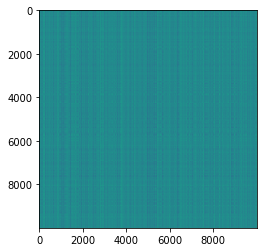

In [37]:
plt.imshow(dis_matrix)#โชว์ภาพ distance matrix
#เอาแต่ละจุดใน matrix มา plot เป็นสี    ยิ่งค่ามากสีก็ยิ่งสว่าง   ยิ่งค่าน้อยสีก็ยิ่งเข้ม ค่า distance
#จุด ทั้งหมด สีเข้มเพราะค่าน้อย

In [38]:
from sklearn.manifold import MDS

In [39]:
mds = MDS(n_components=2)  #dimension = 2

In [40]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')#เส้นแทยงมุมควรเป็น 0 ตามปกติ
#plot แบบนี้จะไม่รู้ว่าสีเข้ม สีสว่าง มีความหมายอย่างไร ไม่รู้ distance ของมัน

NameError: ignored

In [ ]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();#บอกสเกลทำให้รู้ว่าสีขาวหรือน้ำเงิน ในรูปคืออะไร รู้ว่าห่างกันเท่าไหร่
#วิธีอ่านจุดที่ 1 และ จุดที่10000  สีน้ำเงินเข้ม ห่างกันประมาณ 4 ห่างกันที่สุดเเล้ว
#ระยะห่างระหว่าง จุด 10000 มา จุด 1 ก็ 4เท่าเดิม

เลือกวิธีในการลด dimension ของข้อมูลคือ PCA  เพราะ MDS สำหรับข้อมูลชุดนี้ data มันเยอะมาก dimension ก็เยอะ ตอนที่ plot graph ออกมา ดูอะไรไม่ออกเลย